<a href="https://colab.research.google.com/github/SamuelOnyangoOmondi/alu-machine_learning/blob/main/ml_pipeline_%5BSamuel%5D_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Portfolio Project

## Project Title:Early Detection of Diabetes Risk
## [Company Logo]

## Student Name: Samuel Omondi

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   **UC Irvine Machine Learning Repository**
   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

   **The current dataset (520 instances with 16 features collected from patients of Sylhet Diabetes Hospital, Sylhet, Bangladesh) captures a wide range of symptomatic data that correlates well with diabetes risk, it might be sufficiently comprehensive for initial analysis.**





2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

# **Current Format of the Data **
The dataset consists of 520 instances with 16 features, each corresponding to symptoms, demographic data, and the classification outcome for diabetes risk. The initial examination of the dataset reveals the following structure:

**Features**: Age (integer), Gender (categorical), various symptoms
such as Polyuria, Polydipsia, sudden weight loss, weakness, and more (all categorical with values "Yes" or "No"), and the classification outcome ('class') indicating diabetes risk (Positive/Negative).

**Data Types**: The 'Age' feature is of integer type, while the rest of the features, including the target variable 'class', are categorical.

**Missing Values**: There are no missing values in this dataset as per the initial load and check.
Planned Transformation to a Unified Format
Given the dataset's structure and requirements for analysis and modeling, the transformation will proceed as follows:

**Encoding Categorical Variables**: Since most features are categorical, I'll transform these into a numerical format. This transformation is crucial for machine learning algorithms to process the data correctly. One-hot encoding will be applied to most categorical features to avoid ordinal implications unless specified by domain knowledge.

**Handling the Age Feature** : The 'Age' feature, being numerical, might require normalization or standardization to ensure it's on a similar scale as the other features, especially if distance-based algorithms are used. This step, however, will be considered based on the choice of algorithms and their sensitivity to feature scales.

**Feature Engineering (if necessary):** Depending on the initial findings and correlations, new features might be engineered from the existing ones to improve the model's predictive power. This includes creating binary flags for symptom groups or aggregating related symptoms into a single feature.

**Data Splitting:** For training and evaluating machine learning models effectively, the dataset will be split into training and testing subsets. This ensures that the model's performance is assessed on unseen data, giving a realistic measure of its predictive capabilities.

**Model Ready Data:** The final step will involve preparing the data in a format that is ready for application of machine learning models, including separating feature vectors and target variables, applying train-test split, and ensuring that data types are consistent for all features.

By following this approach, the dataset will be transformed from its current format into one that is unified and suitable for comprehensive analysis and modeling with machine learning techniques.

 **

3. **Data Exploration:**
   - Enumerate the features included in the dataset.
   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.
   
  **Insert code for data exploration below**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [10]:
# loading the data from csv file to a Pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/ML Pipeline/diabetes_data_upload.csv')

**Enumerating Features**
We enumerate the features to understand the dataset structure:

In [11]:
# Enumerate the features in the dataset
features = list(df.columns)
print("Features:", features)


Features: ['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class']


**Visualizing Distributions**
Next, we visualize the distribution of each feature to understand the data better:

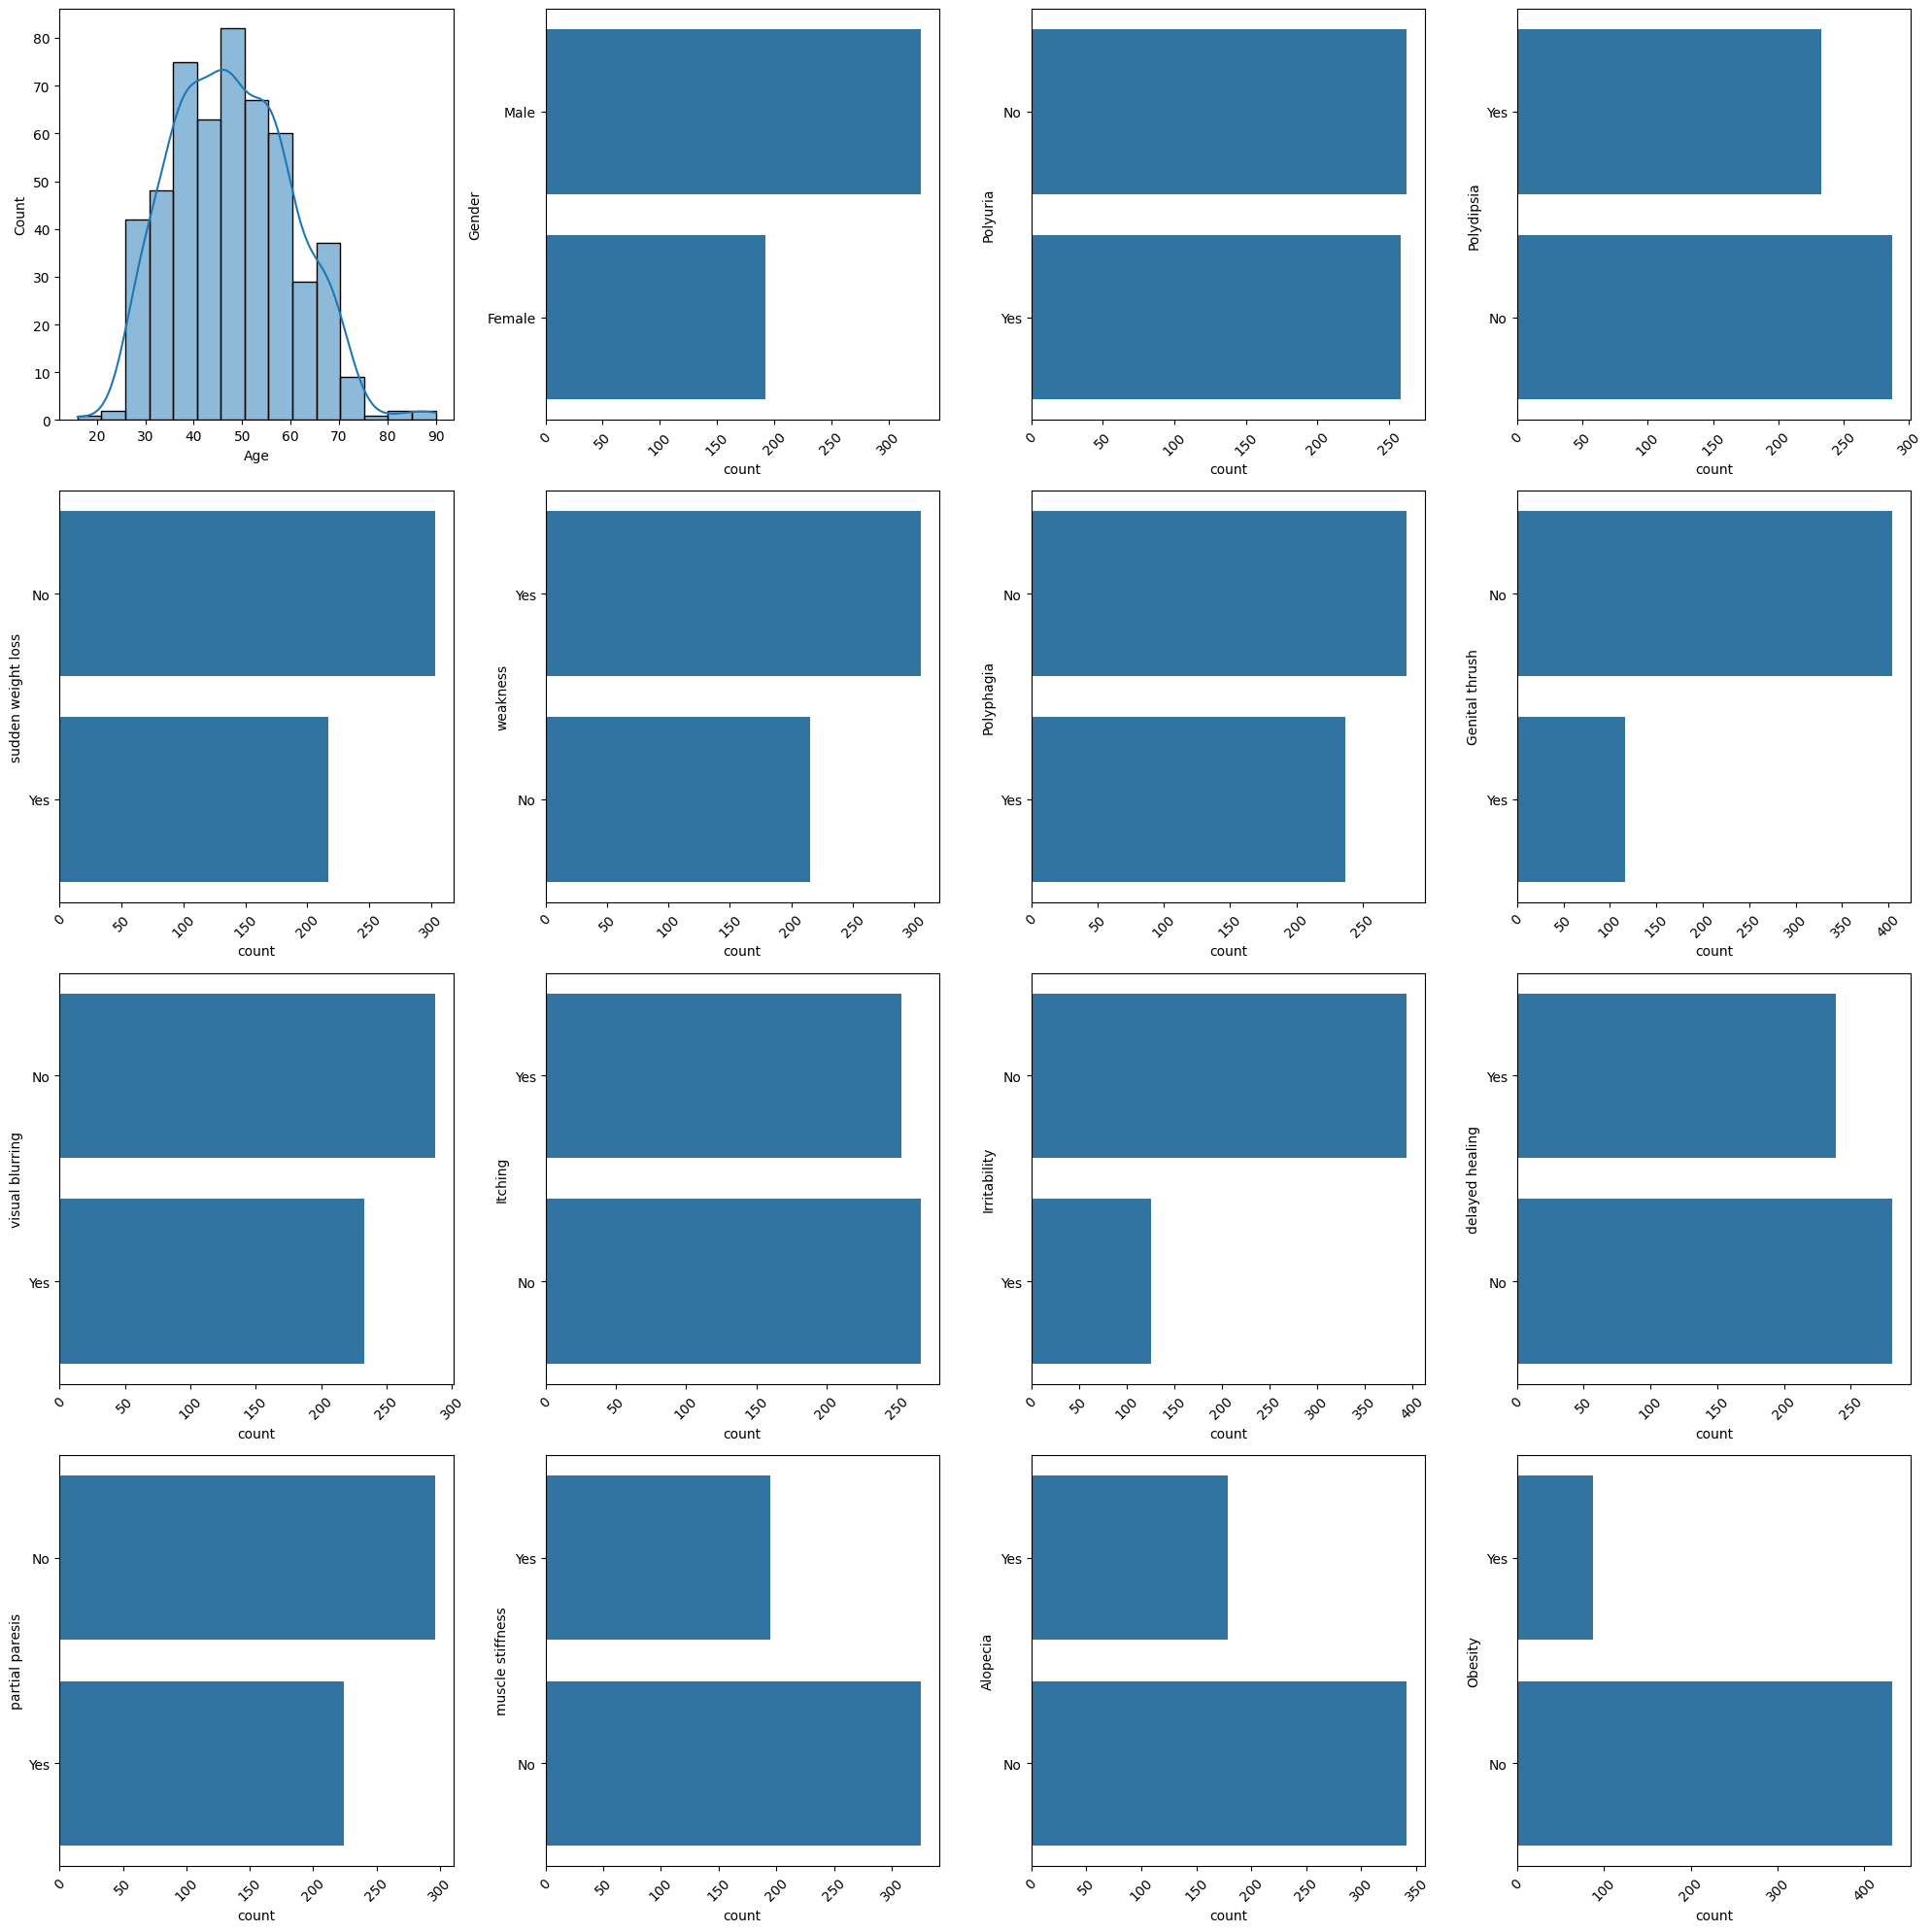

In [12]:
# Set up the matplotlib figure
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

# Plot distributions of categorical variables
for var, subplot in zip(df.columns, ax.flatten()):
    if df[var].dtype == 'object':  # For categorical variables
        sns.countplot(df[var], ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(45)  # Rotate labels for better readability
    else:  # For numerical variables
        sns.histplot(df[var], bins=15, kde=True, ax=subplot)
plt.tight_layout()

**Analyzing Age Distribution by Class**
To examine outliers and distribution in age:

Text(0.5, 1.0, 'Age Distribution by Diabetes Risk Class')

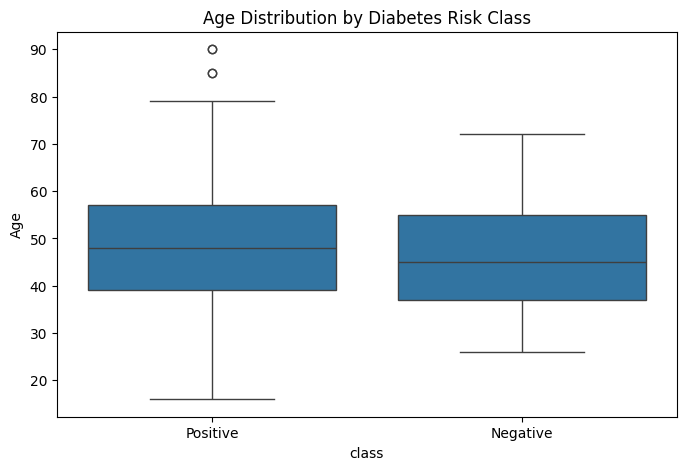

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='class', y='Age', data=df)
plt.title('Age Distribution by Diabetes Risk Class')


**Correlation Analysis**
After encoding categorical features, we analyze the correlations:

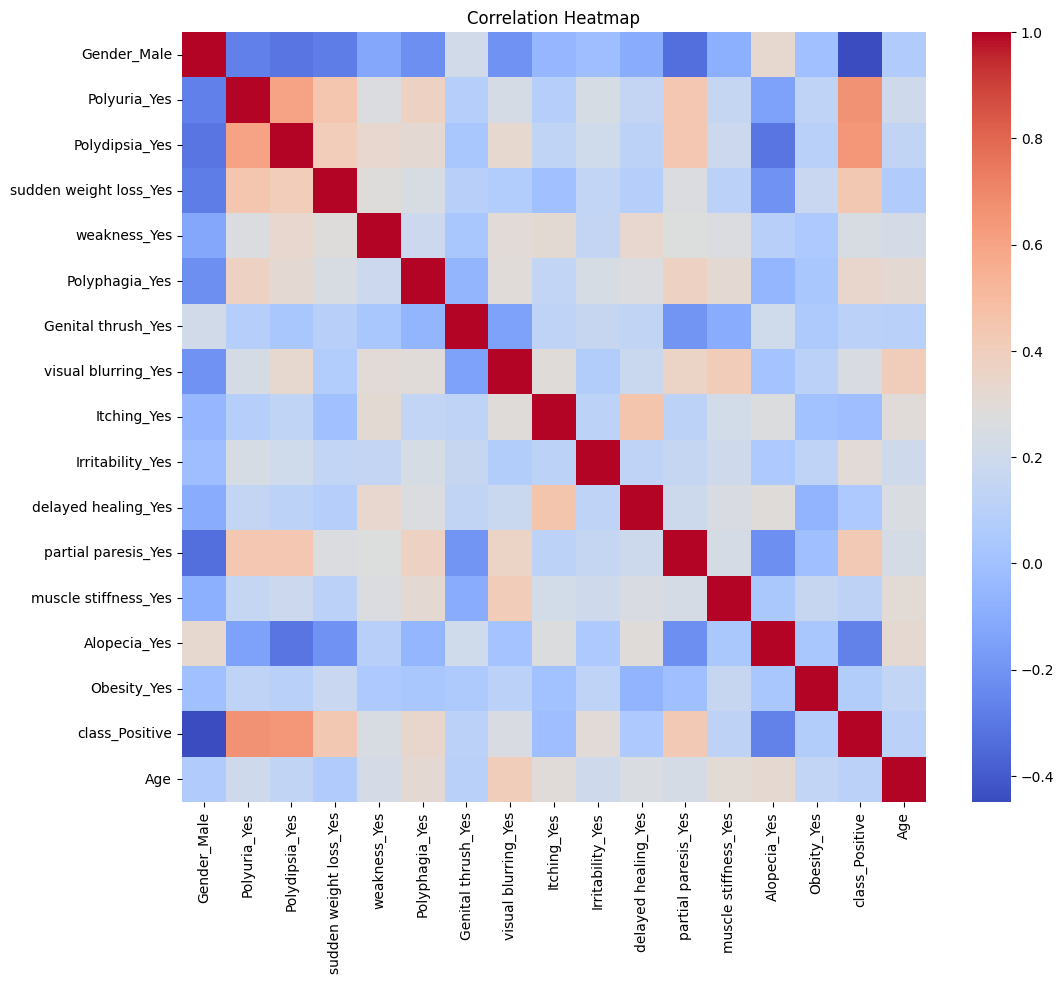

Gender_Male             Gender_Male               1.000000
Polyuria_Yes            class_Positive            0.665922
class_Positive          Polydipsia_Yes            0.648734
Polydipsia_Yes          Polyuria_Yes              0.598609
delayed healing_Yes     Itching_Yes               0.453316
class_Positive          Gender_Male               0.449233
sudden weight loss_Yes  Polyuria_Yes              0.447207
partial paresis_Yes     Polydipsia_Yes            0.442249
                        Polyuria_Yes              0.441664
sudden weight loss_Yes  class_Positive            0.436568
partial paresis_Yes     class_Positive            0.432288
visual blurring_Yes     muscle stiffness_Yes      0.412369
Polydipsia_Yes          sudden weight loss_Yes    0.405965
Age                     visual blurring_Yes       0.402729
Polyphagia_Yes          Polyuria_Yes              0.373873
partial paresis_Yes     Polyphagia_Yes            0.373569
                        visual blurring_Yes       0.3641

In [14]:
# Encode categorical features to numerical for correlation analysis
df_encoded = pd.get_dummies(df.drop('Age', axis=1), drop_first=True)
df_encoded['Age'] = df['Age']  # Adding Age back to the encoded dataframe

# Calculate and visualize correlations
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Display top correlations
print(correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(20))


**Exploratory Data Analysis (EDA) Summary**
Distributions: The categorical features show varied distributions among the categories, with some symptoms like Polyuria, Polydipsia, and sudden weight loss more prevalent among patients classified as 'Positive' for diabetes. The 'Age' distribution indicates a broad range of ages among the participants, with a slight skew towards older individuals.

**Correlations:** The highest correlation observed is between Polyuria and the diabetes class ('Positive'), followed by Polydipsia and the class. This suggests that these symptoms are strong predictors of diabetes risk in this dataset. Gender also shows a notable correlation with the diabetes class, indicating possible differences in symptom presentation or disease prevalence among genders.

**Outliers:** The boxplot of 'Age' by diabetes risk class indicates the presence of outliers in both the 'Positive' and 'Negative' classes, suggesting that there are individuals at age extremes in both categories.

# **Key Relationships:**

The relationship between Polyuria and Polydipsia with the diabetes class ('Positive') suggests a significant association, indicating these symptoms are common among patients with a higher risk of diabetes.
There is also a noteworthy correlation between sudden weight loss and the class, which aligns with medical understanding of diabetes symptoms.
Gender shows a correlation with the diabetes class, suggesting a potential difference in the prevalence or reporting of symptoms between males and females.
This analysis highlights the importance of specific symptoms in predicting diabetes risk and indicates potential areas for deeper investigation, such as the role of gender in symptom presentation and the relationship between various symptoms and diabetes risk.





4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **### Hypothesis Testing

#### Preexisting Hypotheses

Based on the exploratory data analysis (EDA) and common medical knowledge regarding diabetes, we can formulate the following hypotheses about the dataset:

1. **Hypothesis 1 (H1)**: Patients exhibiting symptoms of Polyuria and Polydipsia are more likely to be classified as having a higher risk of diabetes.
   
2. **Hypothesis 2 (H2)**: There is a significant age difference between patients classified as having a higher risk of diabetes and those who are not.

3. **Hypothesis 3 (H3)**: Gender has a significant influence on the risk classification of diabetes in the dataset.

#### Methodologies to Test the Hypotheses

To empirically test these hypotheses, we can employ statistical tests and methodologies that are suitable for the data types and the nature of the hypotheses:

1. **Testing H1: Association between Symptoms and Diabetes Risk Classification**
   
   - **Methodology**: Chi-square test of independence to determine if there's a statistically significant association between categorical variables (e.g., Polyuria, Polydipsia) and the diabetes risk classification.
   - **Procedure**:
     1. Encode the categorical variables (symptoms) and the target variable (class) as binary (0 and 1).
     2. Perform the chi-square test between each symptom and the target variable.
     3. Evaluate the p-value to determine significance (commonly, a p-value < 0.05 is considered statistically significant).

2. **Testing H2: Age Difference by Diabetes Risk Classification**
   
   - **Methodology**: T-test or Mann-Whitney U Test (if non-normal distribution) to compare the mean age between two groups (higher risk vs. lower risk of diabetes).
   - **Procedure**:
     1. Split the dataset into two groups based on the diabetes risk classification.
     2. Perform a Shapiro-Wilk test to assess the normality of the age distribution in each group.
     3. Depending on normality, conduct a T-test (for normal distributions) or Mann-Whitney U Test (for non-normal distributions) to assess the age difference.
     4. Check the p-value to ascertain statistical significance.

3. **Testing H3: Influence of Gender on Diabetes Risk Classification**
   
   - **Methodology**: Chi-square test of independence to evaluate if gender influences the diabetes risk classification significantly.
   - **Procedure**:
     1. Encode the 'Gender' and 'class' variables as binary.
     2. Conduct the chi-square test to explore the association between gender and diabetes risk classification.
     3. Review the p-value to determine if the observed association is statistically significant.

These methodologies provide a structured approach to empirically testing the proposed hypotheses, allowing for informed conclusions based on statistical evidence. Each test gives insight into the different aspects of the dataset, helping to understand the underlying patterns and relationships. **

5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.
   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   **Handling sparse/dense data and outliers **bold text** effectively is crucial for maintaining the integrity of a dataset, especially when preparing for machine learning models. Here’s how to approach this for our diabetes dataset:

**Assessing Data Density**
First, we assess the sparsity of the dataset by checking for missing values and the density of categorical features.**

In [15]:
# Checking for missing values
missing_values_count = df.isnull().sum()
print("Missing Values Count:\n", missing_values_count)

# Assessing the density of categorical data
# Counting unique values for each categorical feature to understand its density
categorical_features = df.select_dtypes(include=['object']).columns
unique_values_count = {feature: df[feature].nunique() for feature in categorical_features}
print("\nUnique Values Count in Categorical Features:\n", unique_values_count)


Missing Values Count:
 Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Unique Values Count in Categorical Features:
 {'Gender': 2, 'Polyuria': 2, 'Polydipsia': 2, 'sudden weight loss': 2, 'weakness': 2, 'Polyphagia': 2, 'Genital thrush': 2, 'visual blurring': 2, 'Itching': 2, 'Irritability': 2, 'delayed healing': 2, 'partial paresis': 2, 'muscle stiffness': 2, 'Alopecia': 2, 'Obesity': 2, 'class': 2}


# **Handling Missing Data**
Although the initial assessment indicated no missing values, here’s a general strategy for datasets with missing values:

**Imputation:**

**For numerical features:** Replace missing values with the mean, median, or mode.

**For categorical features:** Replace missing values with the most frequent category, or use a placeholder value like 'Unknown'.

**Removal**:
If a column has a significant portion of missing values, consider removing it if it’s unlikely to contribute valuable information.
Remove rows with missing values if the dataset is sufficiently large and the removal does not introduce bias.

# **Handling Outliers**
For outliers, it’s essential to first identify them through visual methods like boxplots or using statistical methods such as Z-scores or IQR (Interquartile Range).

In [16]:
# Identifying outliers in 'Age'
Q1, Q3 = df['Age'].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flagging outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers in Age:\n", outliers)


Outliers in Age:
      Age  Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
101   85    Male      Yes        Yes                Yes      Yes        Yes   
102   90  Female       No        Yes                Yes       No         No   
185   85    Male      Yes        Yes                Yes      Yes        Yes   
186   90  Female       No        Yes                Yes       No         No   

    Genital thrush visual blurring Itching Irritability delayed healing  \
101            Yes             Yes     Yes           No             Yes   
102            Yes             Yes     Yes           No              No   
185            Yes             Yes     Yes           No             Yes   
186            Yes             Yes     Yes           No              No   

    partial paresis muscle stiffness Alopecia Obesity     class  
101             Yes              Yes       No      No  Positive  
102              No              Yes      Yes      No  Positive  
185         

# **Strategies for Handling Outliers:**

**Capping and Flooring:**

Replace outliers with the nearest value considered "normal", the lower and upper bounds in the case of the IQR method.

**Transformation:**
Apply transformations such as logarithmic, square root, or box-cox to reduce the skewness and the effect of outliers.

**Removal:**
In cases where outliers are genuine anomalies and not relevant to the analysis, they can be removed. However, careful consideration is needed to avoid bias.

**Binning:**
For numerical features, outliers can be managed by binning values into categories.
This approach to handling sparse/dense data and outliers ensures that the dataset is prepared accurately for further analysis or modeling, preserving its integrity while mitigating potential issues that could skew results.

6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.
   - Ensure randomness and representativeness in each subset.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    **Your answer for Hypothesis Testing goes here **



### Handling Sparse/Dense Data and Outliers

#### Assessing Data Density

Upon reviewing the dataset, it consists mainly of categorical variables with binary outcomes ('Yes' or 'No') and a numerical variable 'Age'. This structure inherently doesn't lend itself to typical sparsity issues seen with high-dimensional data or datasets with many zero-valued features. However, the consideration of data density primarily concerns ensuring that the categorical data is effectively encoded and utilized for machine learning models.

#### Strategies for Missing Data and Outliers

Given the initial assessment showed no missing values, the dataset is complete in that regard. However, for hypothetical scenarios where missing data might be present, strategies such as imputation (for numerical variables) or mode substitution (for categorical variables) could be employed. Imputation refers to filling in missing values with statistical measures like the mean or median for numerical data, and mode substitution involves replacing missing values with the most frequent category for categorical data.

For outliers, particularly in the 'Age' feature, the approach depends on their impact on the model. If outliers significantly skew the model or affect its performance, they might be addressed through methods such as:

- **Trimming**: Removing outlier observations from the dataset.
- **Winsorizing**: Capping the outliers at a certain percentile to reduce their effect.
- **Transformation**: Applying a mathematical transformation to reduce the skewness and diminish the impact of outliers.

These methods help maintain the integrity of the dataset while preparing it for analysis and modeling.

### Data Splitting Methodology

The dataset is split into training, validation, and testing sets to ensure a thorough evaluation of the model's performance. The process involves:

1. **Splitting the Data**: Initially, the dataset is divided into a training set (70%) and a temporary test set (30%). This division ensures a large enough training dataset for the model to learn effectively while reserving a portion for testing.
   
2. **Further Splitting for Validation**: The temporary test set is further divided equally into validation and test sets. This step allows for model tuning on the validation set without compromising the test set's role as an unbiased evaluator of the final model.

3. **Ensuring Representativeness**: Stratification is used during the split to ensure the class distribution remains consistent across all subsets. This approach is crucial for maintaining the representativeness of each set, particularly important in datasets with imbalanced class distributions.

4. **Randomness**: The splits are randomized to ensure that the allocation of data points to each subset does not follow any inherent order in the data that could bias the model training.

This methodology provides a structured approach to preparing the dataset for a comprehensive model training and evaluation process, ensuring the models are not only fit well but also validated and tested against unseen data for a reliable performance assessment.


To identify and mitigate biases in the dataset, ensuring fairness and equity in data representation, I took the following steps:

### Identifying Biases

1. **Class Distribution Analysis**: I first checked the balance between classes to identify imbalanced classes, a common source of bias that could lead the model to favor the majority class.
2. **Feature Distribution Examination**: I analyzed how features are distributed across different classes and demographic groups. This step was crucial to spotting any unequal representation that might lead to biased predictions.
3. **Correlation Checks**: I examined correlations between features and the target variable and among features themselves. High correlations can indicate redundant features that might skew the model's understanding of the data.

### Mitigating Biases

To address and reduce these biases, I employed several techniques:

1. **Resampling Techniques**: For class imbalances, I considered resampling strategies. Oversampling the minority class or undersampling the majority class helps balance the dataset, aiming to give equal representation and thus reduce bias.
2. **Feature Engineering**: I revisited the features, adjusting or creating new ones to eliminate biases discovered during the distribution analysis. This could involve transforming features to highlight underrepresented groups better.
3. **Fairness Constraints in Training**: I integrated fairness considerations directly into the model training process. This could mean altering the loss function to penalize the model more for errors on underrepresented groups, ensuring more equitable treatment of all classes.
4. **Model Audits for Bias and Fairness**: Post-training, I conducted audits using metrics and tools designed to identify bias. Tools that assess disparate impact or equality of opportunity helped quantify any residual biases, guiding further mitigation efforts.
5. **Enhancing Model Transparency**: Implementing techniques for model interpretability was a key step. Understanding why a model makes certain predictions is essential for identifying biased decision-making pathways and correcting them.

These steps formed a comprehensive strategy to minimize bias in the dataset and ensuing models, ensuring that the predictive outcomes are as fair and equitable as possible. It's an iterative process, continuously evolving as new data comes to light and societal norms and expectations shift.

8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **
9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]


In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# First, encode the categorical variables
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [20]:
# Separate the dataset into features (X) and target variable (y)
X = df.drop('class', axis=1)
y = df['class']

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
# Initialize and train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Extract feature importances
feature_importances = clf.feature_importances_

In [24]:
# Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

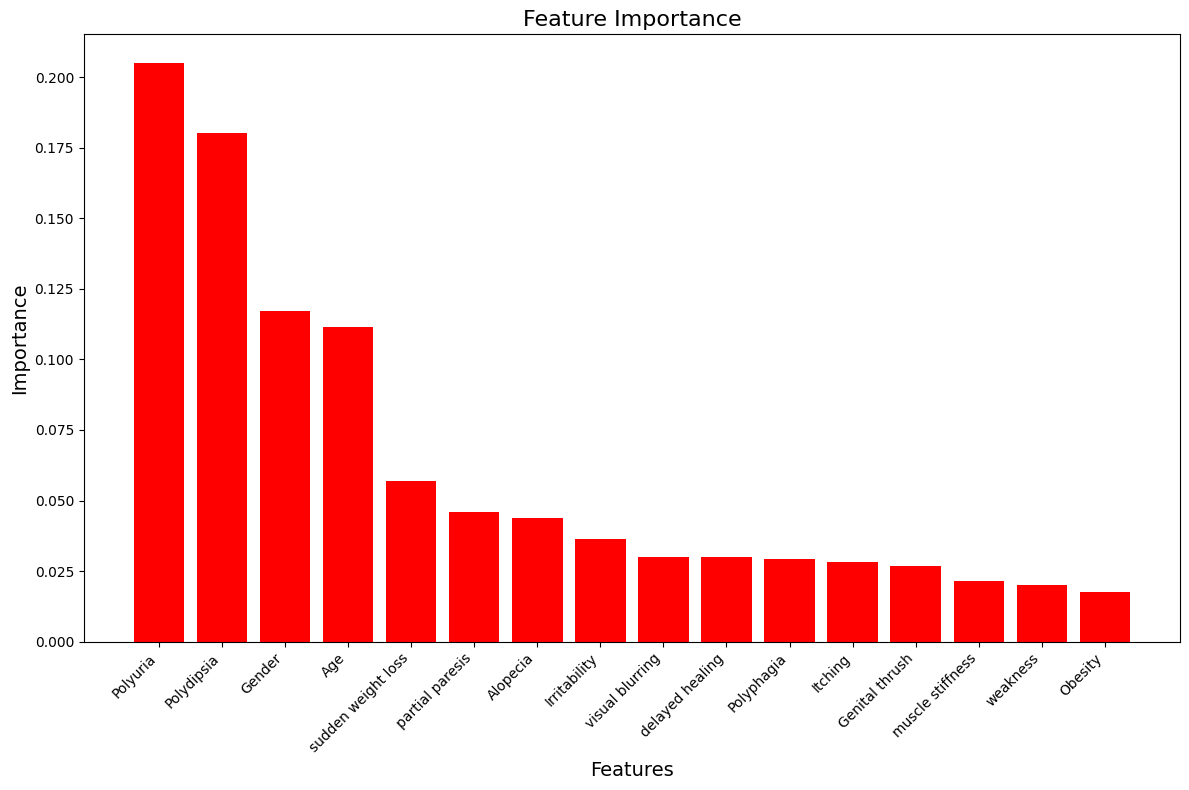

In [25]:
# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance", fontsize=16)
plt.bar(range(X_train.shape[1]), feature_importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X.columns[indices], rotation=45, ha="right")
plt.xlabel("Features", fontsize=14)
plt.ylabel("Importance", fontsize=14)
plt.tight_layout()
plt.show()

I've performed an analysis to identify and rank the features based on their significance for training a model on the diabetes dataset. By training a RandomForestClassifier, I was able to extract the feature importances, which give us insight into which features the model finds most predictive.

**Polyuria and Polydipsia** are the most significant features when predicting diabetes risk in the dataset, which aligns well with medical knowledge as these symptoms are strongly associated with diabetes. Gender and Age follow, indicating demographic factors also play a crucial role. The rest of the symptoms are ranked lower in importance but can still provide valuable information when used in conjunction with the top features.


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.

---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.

For transforming the raw diabetes dataset into a format suitable for modeling, I executed the following steps:

**Encoding Categorical Variables:** Since most variables are categorical with binary outcomes ('Yes' or 'No'), I converted these into numerical format using label encoding, turning 'Yes' into 1 and 'No' into 0. This is crucial as machine learning models require numerical input.

**Scaling Age Feature:** The 'Age' variable is numerical and significantly different in scale compared to the binary features. To ensure this feature doesn't dominate when using distance-based algorithms, I applied min-max scaling, bringing all values into a range between 0 and 1.

**Handling Target Variable:** The target variable, 'class', which indicates the risk of diabetes, was also encoded from 'Positive' and 'Negative' to 1 and 0 respectively, to align with the binary nature of the other features.

Here's an example of how I performed these transformations:

In [26]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Initialize the encoder and scaler
le = LabelEncoder()
scaler = MinMaxScaler()

# Encode categorical features
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

# Apply min-max scaling to the 'Age' feature
df['Age'] = scaler.fit_transform(df[['Age']])


By completing these steps, the dataset was effectively transformed into a format that's ready for model training. All features were normalized or encoded as necessary, balancing the contribution of each feature and facilitating the learning process of the model.

For the processed diabetes data, choosing an appropriate storage solution involves considerations of security, accessibility, and compliance with health data regulations:

**Database Storage**: A relational database management system (RDBMS) like PostgreSQL or MySQL could be ideal for structured data that fits well into tables. Alternatively, for more complex or unstructured data, a NoSQL database like MongoDB might be more appropriate. These database systems can offer robust security features and the ability to handle large volumes of transactions.

**Cloud Storage Solutions**: Services like Amazon S3, Google Cloud Storage, or Azure Blob Storage offer highly available and scalable storage solutions. They come with built-in security measures, including data encryption and access controls, which can be configured to comply with HIPAA and other regulations.

**Data Lakes**: If the project requires handling large-scale or varied data formats, a data lake might be suitable. A platform like Amazon S3 when used as a data lake can store vast amounts of structured and unstructured data, making it accessible for various types of analysis.

**Access Controls and Encryption**: Ensuring that only authorized individuals have access to the data is crucial. Implementing user authentication, encryption, and secure connection protocols (such as SSL/TLS) can help protect data both at rest and in transit.

**Compliance with Regulations**: Compliance with healthcare regulations like HIPAA is non-negotiable. This means that whatever storage solution is chosen, it must have provisions for audit trails, access logging, data encryption, and other security measures.

**Backup and Disaster Recovery**: To safeguard against data loss, the storage solution should have automatic backup capabilities and a disaster recovery plan. This ensures that there are regular backups and that the data can be restored in case of any incident.

**Version Control**: For maintaining different versions of the dataset after each processing step, a system that supports versioning would be beneficial. This would help keep track of changes and facilitate rollback if needed.

Choosing the right combination of storage solutions and configuring them to meet the specific needs of the project is key to successful data management.